## Import Libraries

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
BASE_PATH = '../input/siim-isic-melanoma-classification'
hair_images =['ISIC_0078712','ISIC_0080817','ISIC_0082348','ISIC_0109869','ISIC_0155012','ISIC_0159568','ISIC_0164145','ISIC_0194550','ISIC_0194914','ISIC_0202023']
without_hair_images = ['ISIC_0015719','ISIC_0074268','ISIC_0075914','ISIC_0084395','ISIC_0085718','ISIC_0081956']

[]

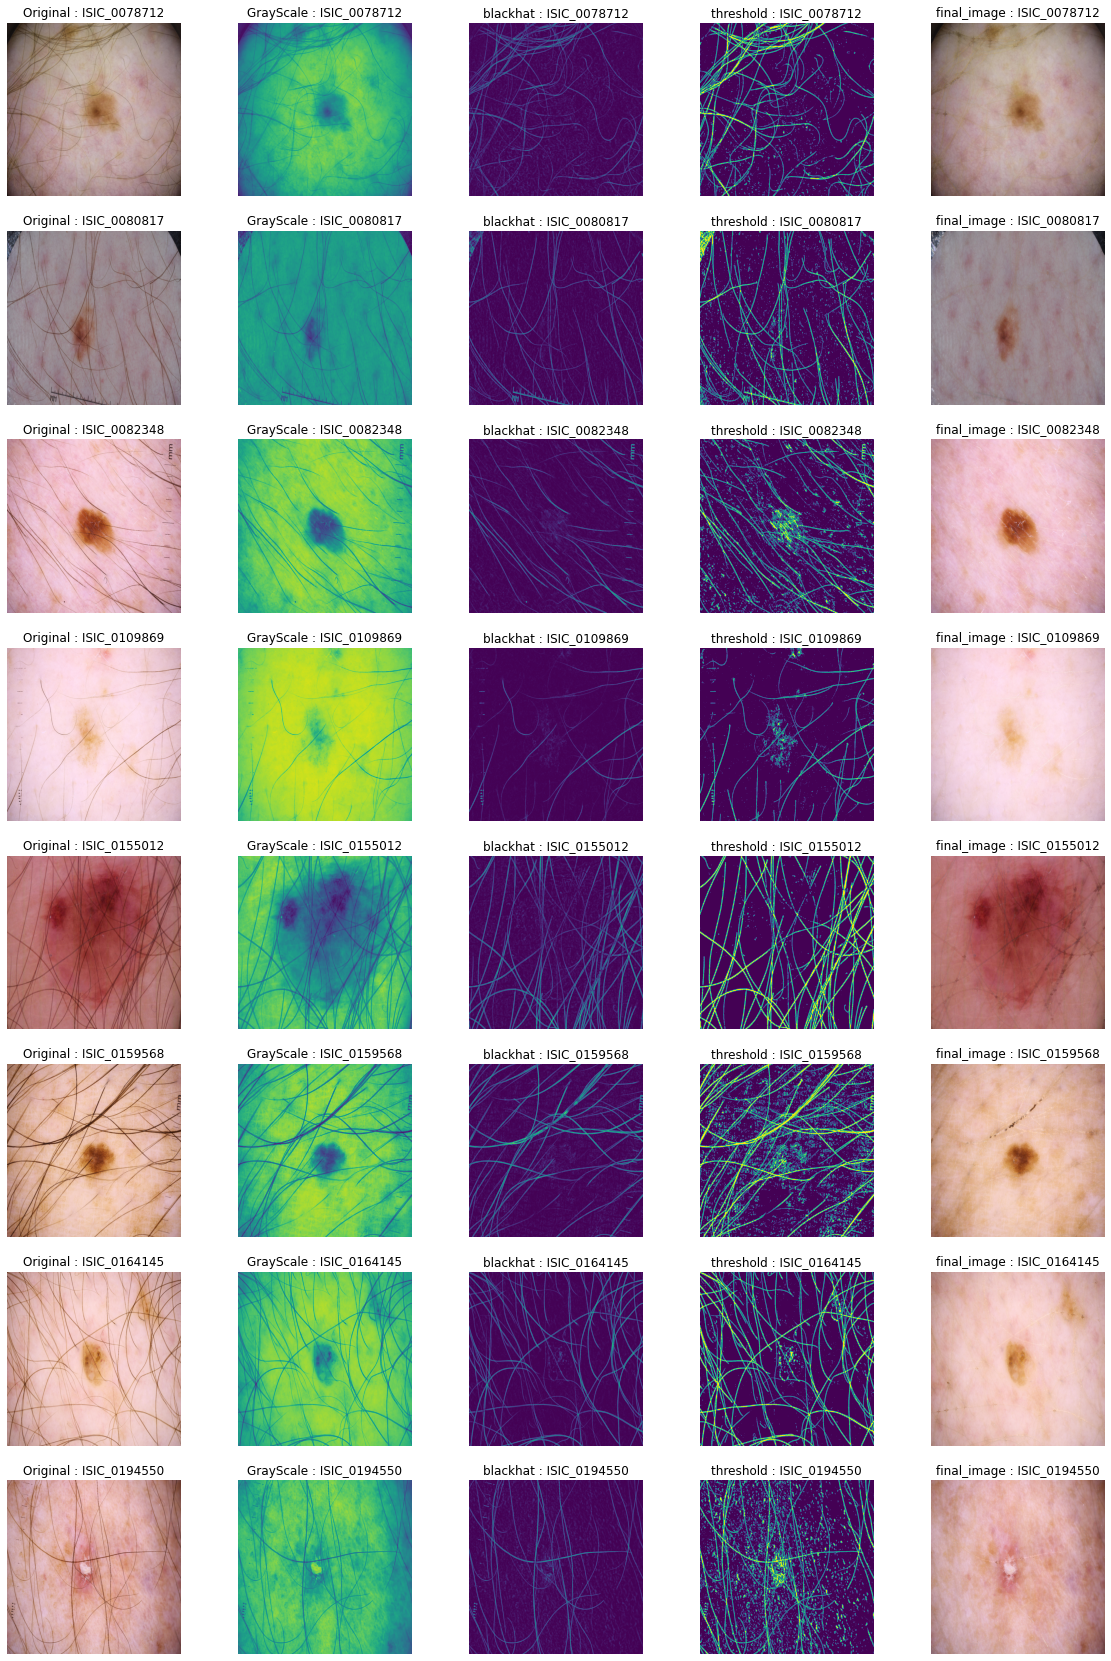

In [3]:
l = len(hair_images[:8])

fig = plt.figure(figsize=(20,30))

for i,image_name in enumerate(hair_images[:8]):
    
    
    image = cv2.imread(BASE_PATH + '/jpeg/train/' + image_name + '.jpg')
    image_resize = cv2.resize(image,(1024,1024))
    plt.subplot(l, 5, (i*5)+1)
    # Convert the original image to grayscale
    plt.imshow(cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original : '+ image_name)
    
    grayScale = cv2.cvtColor(image_resize, cv2.COLOR_RGB2GRAY)
    plt.subplot(l, 5, (i*5)+2)
    plt.imshow(grayScale)
    plt.axis('off')
    plt.title('GrayScale : '+ image_name)
    
    # Kernel for the morphological filtering
    kernel = cv2.getStructuringElement(1,(17,17))
    
    # Perform the blackHat filtering on the grayscale image to find the hair countours
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    plt.subplot(l, 5, (i*5)+3)
    plt.imshow(blackhat)
    plt.axis('off')
    plt.title('blackhat : '+ image_name)
    
    # intensify the hair countours in preparation for the inpainting 
    ret,threshold = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
    plt.subplot(l, 5, (i*5)+4)
    plt.imshow(threshold)
    plt.axis('off')
    plt.title('threshold : '+ image_name)
    
    # inpaint the original image depending on the mask
    final_image = cv2.inpaint(image_resize,threshold,1,cv2.INPAINT_TELEA)
    plt.subplot(l, 5, (i*5)+5)
    plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('final_image : '+ image_name)
       
plt.plot()

In [4]:
def hair_remove(image):
    # convert image to grayScale
    grayScale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # kernel for morphologyEx
    kernel = cv2.getStructuringElement(1,(17,17))
    
    # apply MORPH_BLACKHAT to grayScale image
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    
    # apply thresholding to blackhat
    _,threshold = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
    
    # inpaint with original image and threshold image
    final_image = cv2.inpaint(image,threshold,1,cv2.INPAINT_TELEA)
    
    return final_image

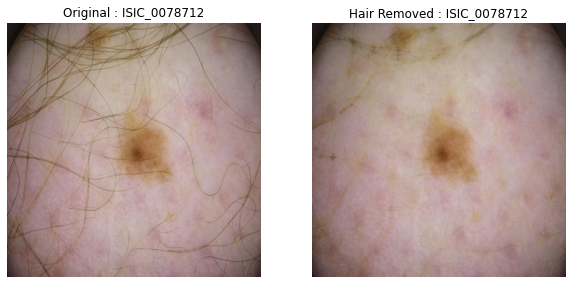

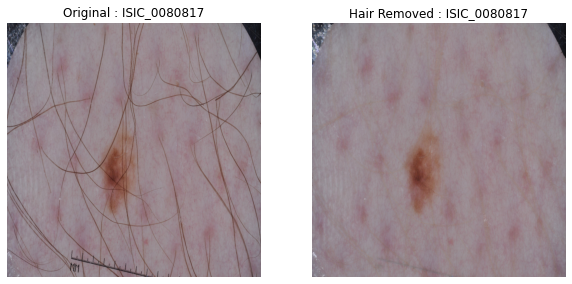

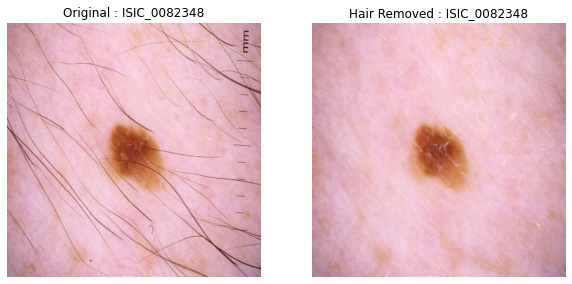

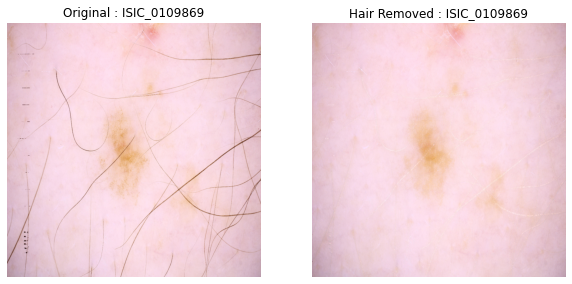

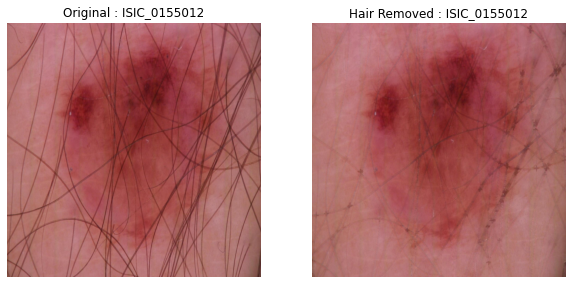

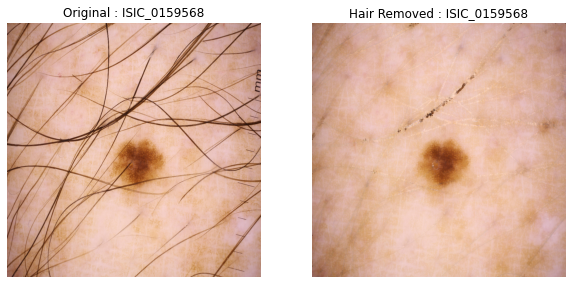

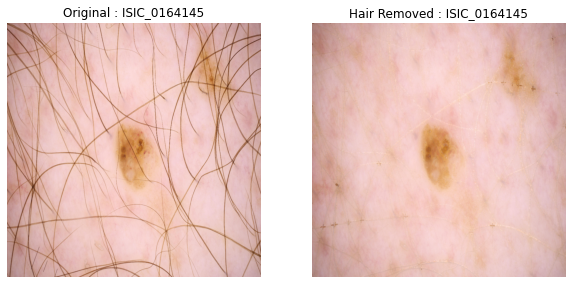

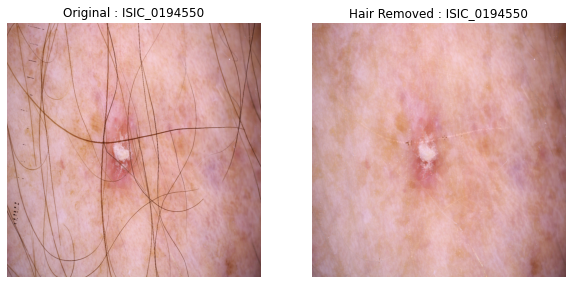

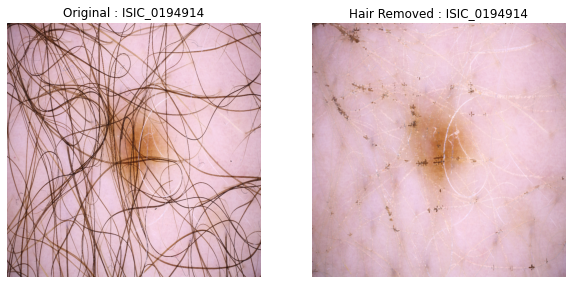

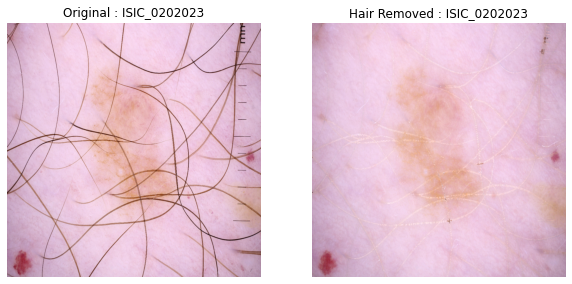

In [5]:
for i,image_name in enumerate(hair_images):
    
    fig = plt.figure(figsize=(10,5))
    
    image = cv2.imread(BASE_PATH + '/jpeg/train/' + image_name + '.jpg')
    image_resize = cv2.resize(image,(1024,1024))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original : '+ image_name)
    
    final_image = hair_remove(image_resize)
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Hair Removed : '+ image_name)
    
    plt.plot()

## Time taken by one image (CPU)

In [6]:
image = cv2.imread(BASE_PATH + '/jpeg/train/' + 'ISIC_0109869' + '.jpg')


In [7]:
%%time
## for 256,256 image
image_resize = cv2.resize(image,(256,256))
final_image = hair_remove(image_resize)

CPU times: user 16.2 ms, sys: 5 µs, total: 16.2 ms
Wall time: 15.7 ms


In [8]:
%%time
## for 512,512 image
image_resize = cv2.resize(image,(512,512))
final_image = hair_remove(image_resize)

CPU times: user 175 ms, sys: 0 ns, total: 175 ms
Wall time: 165 ms


In [9]:
%%time
## for 1024,1024 image
image_resize = cv2.resize(image,(1024,1024))
final_image = hair_remove(image_resize)

CPU times: user 1.51 s, sys: 0 ns, total: 1.51 s
Wall time: 1.49 s


## apply this method on without hair Images

[]

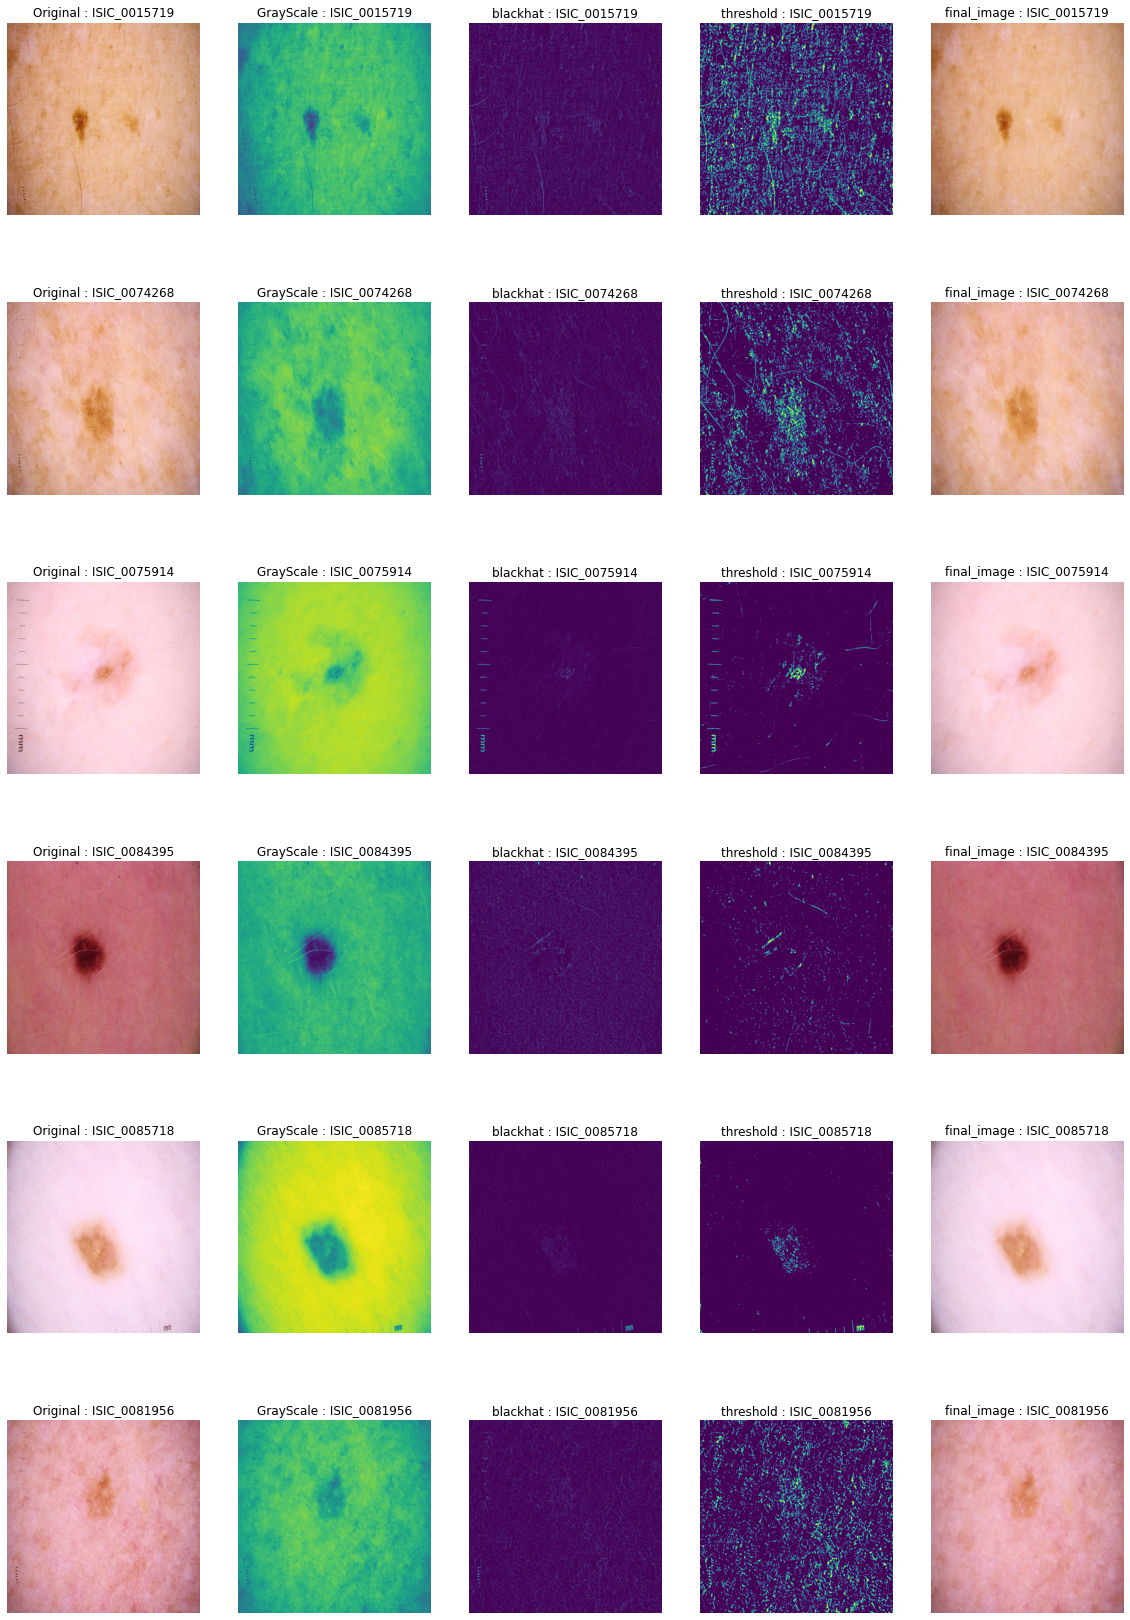

In [10]:
l = len(without_hair_images)

fig = plt.figure(figsize=(20,30))

for i,image_name in enumerate(without_hair_images):
    
    
    image = cv2.imread(BASE_PATH + '/jpeg/train/' + image_name + '.jpg')
    image_resize = cv2.resize(image,(1024,1024))
    plt.subplot(l, 5, (i*5)+1)
    # Convert the original image to grayscale
    plt.imshow(cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original : '+ image_name)
    
    grayScale = cv2.cvtColor(image_resize, cv2.COLOR_RGB2GRAY)
    plt.subplot(l, 5, (i*5)+2)
    plt.imshow(grayScale)
    plt.axis('off')
    plt.title('GrayScale : '+ image_name)
    
    # Kernel for the morphological filtering
    kernel = cv2.getStructuringElement(1,(17,17))
    
    # Perform the blackHat filtering on the grayscale image to find the hair countours
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    plt.subplot(l, 5, (i*5)+3)
    plt.imshow(blackhat)
    plt.axis('off')
    plt.title('blackhat : '+ image_name)
    
    # intensify the hair countours in preparation for the inpainting 
    ret,threshold = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
    plt.subplot(l, 5, (i*5)+4)
    plt.imshow(threshold)
    plt.axis('off')
    plt.title('threshold : '+ image_name)
    
    # inpaint the original image depending on the mask
    final_image = cv2.inpaint(image_resize,threshold,1,cv2.INPAINT_TELEA)
    plt.subplot(l, 5, (i*5)+5)
    plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('final_image : '+ image_name)
       
plt.plot()

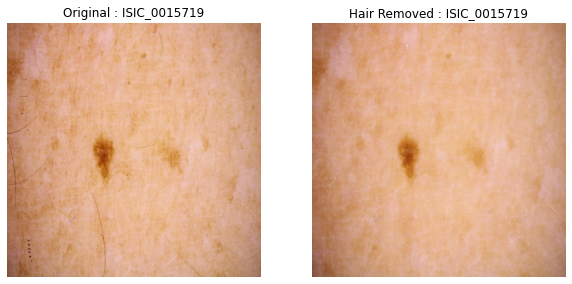

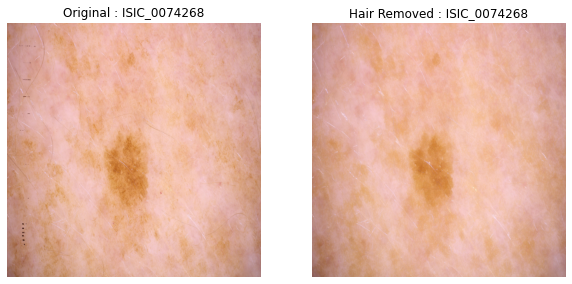

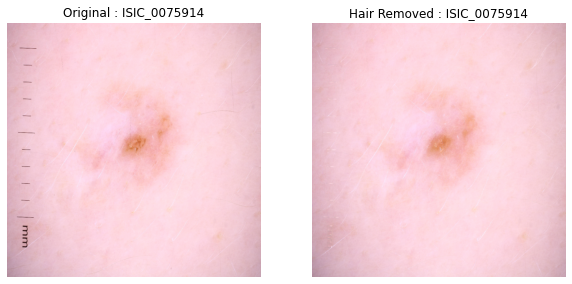

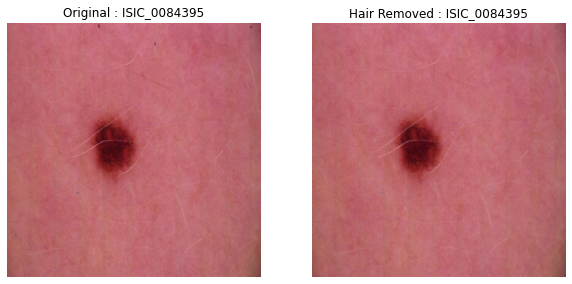

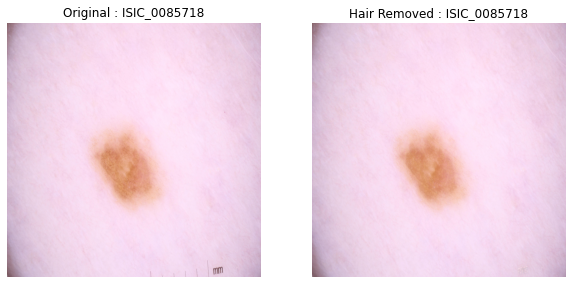

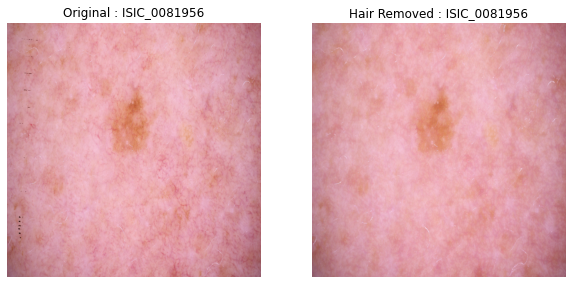

In [11]:
for i,image_name in enumerate(without_hair_images):
    
    fig = plt.figure(figsize=(10,5))
    
    image = cv2.imread(BASE_PATH + '/jpeg/train/' + image_name + '.jpg')
    image_resize = cv2.resize(image,(1024,1024))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original : '+ image_name)
    
    final_image = hair_remove(image_resize)
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Hair Removed : '+ image_name)
    
    plt.plot()